In [21]:
%load_ext autoreload
%autoreload 2

# Generating samples and parsing parameters scan file



In [1]:
# from GENE_ML.gene_ml.samplers.uniform import Uniform
# from GENE_ML.gene_ml.executors.ScanExecutor import ScanExecutor
# from GENE_ML.gene_ml.runners.GENErunner import GENErunner
# from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

# import os
# import sys
# sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))


# parameters = ['box-kymin', '_grp_species_1-omt', '_grp_species_0-omt', 'species-omn', 'geometry-q0', 'geometry-shat', 'general-beta'] #Geometry, Solver, x0,
# bounds = [(0.05,1), (10,70), (10,70), (5,60), (3,6), (0.001,4), (0.1E-2,0.4E-2)]

# #Working fine
# # parameters = ['box-kymin', '_grp_species_1-omt', 'species-omn']
# # bounds = [(0.05,1), (10,70), (5,60)]

# num_samples = 700
# sampler = Uniform(parameters=parameters, bounds=bounds, num_samples=num_samples)

# ##Parser
# #The parsers main function is write_input_file
# # wite_input_file takes a parameters file from base_params_path and a set of points in the form of a dict {param1:[point1,point2...], param2:[point1,point2...]...} 
# #  It will then create a parameters file that can scan over all the points.
# base_params_path = os.path.join(os.getcwd(),'parameters_base_dp')
# remote_save_dir='/scratch/project_462000451/gene_out/gene_auto/5000s_7p'
# parser = GENE_scan_parser(base_params_path, remote_save_dir)

# ## Runner
# #The Runner is responsible for actually running a parameters file on lumi. Its main function is code_run.
# # code_run will take the set of points named samples and parse them into a parameters file.
# #  It then uses ssh to run GENE with this parametres file and a passed sbatch script.
# remote_run_dir = '/project/project_462000451/gene_auto/'
# host = 'lumi' #needs to be configured in /home/<user>/.ssh/config
# base_sbatch_path = os.path.join('sbatch_base_dp')
# single_run_timelim = 200 # a guess for the number of seconds it takes to run one sample.
# runner = GENErunner(parser, remote_run_dir, host, base_sbatch_path, single_run_timelim)

# ##Executor
# #The executor will divide the samples into batches; one for each worker. Each batch will be ran in paralell in seperate sbatch jobs. 
# # The executor should alter a base batch script to account for that less samples will be ran. 
# num_workers = 20
# executor = ScanExecutor(num_workers, sampler, runner, remote_save_dir=remote_save_dir)
# # if project == 'UQ':
# #     #UQ
# #     ##Sampler args dependant on sampler chosen
# #     parameters = ['box-kymin', '_grp_species_0-omt', '_grp_species_1-omt']
# #     bounds = [(0.1,100.0),(2,3.5), (4,6.75)]
# #     ##Parser args
# #     base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')


# #Sampling the data


import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.uniform import Uniform
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import config
                                                                                                                        # scan Bref and not beta
parameters = ['box-kymin', '_grp_species_1-omt', '_grp_species_0-omt', 'species-omn', 'geometry-q0', 'geometry-shat', 'general-beta'] #Geometry, Solver, x0,
bounds = [(0.05,1), (10,70), (10,70), (5,60), (3,6), (0.001,4), (0.1E-2,0.4E-2)]
num_samples = 4
sampler = Uniform(parameters=parameters, num_samples=num_samples ,bounds=bounds)

remote_save_name = "prelim_test"
num_workers = 2
single_run_timelim = 500
prelim_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id='prelim', single_run_timelim=single_run_timelim, num_workers=num_workers)

PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


In [3]:
# prelim_datagen.executor.start_runs()
# prelim_datagen.executor.continue_n_times(n=3)

In [18]:
import numpy as np
a = [1,2,3,4,5,5,5]
np.argmax(a)

4

In [ ]:
if prelim_datagen.executor.check_finished():
    prelim_datagen.executor.check_complete()

In [17]:

prelim_datagen.executor.continue_n_times(n=3)

Executing continue number: 0
NONE OF THE INPUTED SBATCH IDs ARE RUNNING
RUNS ARE FINISHED
GETTING RUN FILE:  auto_gene.7825888.out
GETTING RUN FILE:  auto_gene.7825889.out
CONTINUING RUNS - ['ex-prelim_batch-0', 'ex-prelim_batch-1']
Executing continue number: 1
RUNNING SBATCH IDs:  {'7825897', '7825896'}
Waiting untill the runs are finished. TIMER:  00-00:00:2  dd-hh:mm:ss
NONE OF THE INPUTED SBATCH IDs ARE RUNNING
RUNS ARE FINISHED
GETTING RUN FILE:  auto_gene.7825896.out
GETTING RUN FILE:  auto_gene.7825897.out
CONTINUING RUNS - ['ex-prelim_batch-0', 'ex-prelim_batch-1']
Executing continue number: 2
RUNNING SBATCH IDs:  {'7825906', '7825905'}
Waiting untill the runs are finished. TIMER:  00-00:00:1  dd-hh:mm:ss
NONE OF THE INPUTED SBATCH IDs ARE RUNNING
RUNS ARE FINISHED
GETTING RUN FILE:  auto_gene.7825905.out
GETTING RUN FILE:  auto_gene.7825906.out
CONTINUING RUNS - ['ex-prelim_batch-0', 'ex-prelim_batch-1']
END OF CONTINUE N TIMES


In [12]:
prelim_datagen.executor.delete()

EXECUTOR DELETE
DELETING, /project/project_462000451/gene/auto_prob_ex-prelim_batch-0 temp/*ex-prelim_batch-0
DELETING, /project/project_462000451/gene/auto_prob_ex-prelim_batch-1 temp/*ex-prelim_batch-1
DELETING, /scratch/project_462000451/gene_out/gene_auto/prelim_test
EXECUTOR DELETING run_files


rm: cannot remove 'run_files/auto_gene.7826552.out': No such file or directory
rm: cannot remove 'run_files/auto_gene.7826554.out': No such file or directory


In [2]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
from config import config

host = 'lumi'
data_name = 'prelim'
test_percentage = 0
#If the data is already loaded from the remote to local .../scanlogs/<data_name> then the host and remote path can be ommitted
prelim_dataset = ScanData(data_name, host=config.host, remote_path=prelim_datagen.remote_save_dir, parser=prelim_datagen.parser, test_percentage=test_percentage)
prelim_dataset.df

Initialising dataset
SSH PATH lumi1:/scratch/project_462000451/gene_out/gene_auto/prelim_test
SCAN LOG PATH /home/djdaniel/DEEPlasma/scanlogs/prelim

LOADING FROM SCANLOG DIR: /home/djdaniel/DEEPlasma/scanlogs/prelim
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'scan_batch-0_scanfiles-0.log'
 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/DEEPlasma/scanlogs/prelim/scan_batch-0_scanfiles-0.log : None

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/DEEPlasma/scanlogs/prelim/scan_batch-1_scanfiles-0.log : None

2 SAMPLES RAN OUT OF 2 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 2
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT


/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:185: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df_inc_nan = pd.concat(dfs_inc_nans)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:188: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs), np.sum(n_samp_all), np.sum(n_requested_all), np.sum(n_samp_nonan_all)


,run_time,omt2,omt1,omn1,shat1,q01,beta1,kymin1,growthrate,frequency
0,NaN,38.34617,43.52419,44.42964,3.974695,5.542226,0.003409,0.225655,8.0720,9.4680
1,NaN,64.91462,62.27664,8.38651,2.829635,4.741362,0.003198,0.239661,7.3840,7.7860


In [18]:
import pandas as pd
import numpy as np
a= np.array([[1,2,3,4],[0.1,0.2,0.3,0.4]]).T
b = np.array([5,6,7,8])

A = pd.DataFrame(a, columns=['setA', 'set.a'])
B = pd.DataFrame(b, columns=['setB'])

A2 = A.drop(columns=['setA'])
print('A',A)
print('A2', A2)
# C = pd.concat([B,A], axis=1)
# C


A    setA  set.a
0   1.0    0.1
1   2.0    0.2
2   3.0    0.3
3   4.0    0.4
A2    set.a
0    0.1
1    0.2
2    0.3
3    0.4


In [3]:
# datagen.executor.start_runs()

# Pulling Scanlog from Lumi 

In [3]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import config
import os

remote_save_name = '5000s_7p'
remote_save_dir = os.path.join(config.remote_save_base_dir,remote_save_name)
parser = GENE_scan_parser(config.save_dir, config.base_params_path, remote_save_dir)


host = 'lumi'
data_name = '5000s_7p'
test_percentage = 50

parameters_map = {'box-kymin':'kymin1',
                  '_grp_species_1-omt':'omt2',
                  '_grp_species_0-omt':'omt1',
                  'species-omn':'omn1',
                  'geometry-q0':'q01',
                  'geometry-shat':'shat1',
                  'general-beta':'beta1'}

#If the data is already loaded from the remote to local .../scanlogs/<data_name> then the host and remote path can be ommitted
data_set = ScanData(data_name, host=config.host, remote_path=remote_save_dir, parser=parser, test_percentage=test_percentage, parameters_map=parameters_map)
data_set.match_parameters_order(parameters)
data_set.df

Initialising dataset
SSH PATH lumi1:/scratch/project_462000451/gene_out/gene_auto/5000s_7p
SCAN LOG PATH /home/djdaniel/DEEPlasma/scanlogs/5000s_7p

LOADING FROM SCANLOG DIR: /home/djdaniel/DEEPlasma/scanlogs/5000s_7p
LOG PATHS ['geneerr_batch-0_0.log' 'geneerr_batch-0_1.log' 'geneerr_batch-0_10.log'
 'geneerr_batch-0_11.log' 'geneerr_batch-0_12.log'
 'geneerr_batch-0_13.log' 'geneerr_batch-0_14.log'
 'geneerr_batch-0_15.log' 'geneerr_batch-0_16.log'
 'geneerr_batch-0_17.log' 'geneerr_batch-0_18.log'
 'geneerr_batch-0_19.log' 'geneerr_batch-0_2.log' 'geneerr_batch-0_20.log'
 'geneerr_batch-0_3.log' 'geneerr_batch-0_4.log' 'geneerr_batch-0_5.log'
 'geneerr_batch-0_6.log' 'geneerr_batch-0_7.log' 'geneerr_batch-0_8.log'
 'geneerr_batch-0_9.log' 'scan_batch-0_0.log' 'scan_batch-0_1.log'
 'scan_batch-0_10.log' 'scan_batch-0_11.log' 'scan_batch-0_12.log'
 'scan_batch-0_13.log' 'scan_batch-0_14.log' 'scan_batch-0_15.log'
 'scan_batch-0_16.log' 'scan_batch-0_17.log' 'scan_batch-0_18.log'
 'sca

,run_time,kymin1,omt2,omt1,omn1,q01,shat1,beta1,growthrate,frequency
0,3.972,0.225655,55.19910,33.96021,52.008700,3.843630,1.315692,0.001105,5.3950,9.1130
1,1.705,0.239661,54.62636,69.78608,51.447960,5.092838,1.498748,0.003788,10.1140,13.8750
7,1.906,0.115503,61.25873,56.25225,18.619810,5.487717,1.736063,0.001865,9.8640,4.0210
10,21.402,0.475377,33.22105,37.66978,12.453850,3.949417,1.773974,0.003445,1.9310,-2.5220
13,2.036,0.108494,37.51825,39.12765,59.017660,3.687322,1.083528,0.002222,11.8230,5.1930
...,...,...,...,...,...,...,...,...,...,...
239,7.657,0.298063,66.60476,35.13247,45.245700,5.193880,3.121494,0.001799,3.5080,10.9830
240,14.749,0.364511,60.72701,20.90660,40.640050,5.057919,1.429262,0.001787,3.3100,10.1990
241,11.208,0.475426,30.88569,16.21406,6.317262,5.506229,2.238682,0.002725,3.1610,4.3160
244,15.154,0.856212,27.77436,26.30215,20.327830,4.951364,3.668582,0.003851,0.5890,-8.3100


In [8]:

# importing the modules
import pandas as pd
import numpy as np
 
# creating the DataFrame
my_data = {'Sr.no': [1, 2, 3, 4, 5], 
           'Name': ['Ram', 'Sham', 'Sonu', 
                    'Tinu', 'Monu'], 
           'Maths Score': [45, 67, 89, 74, 56]}
df = pd.DataFrame(data = my_data)
 
# printing the original DataFrame
print("My Original DataFrame")
display(df)
 
# printing the new DataFrame
print("My new DataFrame")
 
df = df.loc[:,['Maths Score','Name']]

display(df)

My Original DataFrame


,Sr.no,Name,Maths Score
0,1,Ram,45
1,2,Sham,67
2,3,Sonu,89
3,4,Tinu,74
4,5,Monu,56


My new DataFrame


,Maths Score,Name
0,45,Ram
1,67,Sham
2,89,Sonu
3,74,Tinu
4,56,Monu


In [22]:
prelim_datagen.sampler.parameters

['box-kymin',
 '_grp_species_1-omt',
 '_grp_species_0-omt',
 'species-omn',
 'geometry-q0',
 'geometry-shat',
 'general-beta']

In [6]:
from GENE_ML.gene_ml.models.GPR import GPR
gpr = GPR(name='time_pred')
gpr.tune_hypers(data_set.x_train, data_set.run_time)

time, er = gpr.predict(prelim_datagen.sampler.samples_array)

OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 70163.95456659648
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (7,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -4286.551799745356


 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide


Optimization restart 2/3, f = -5740.8172058473565
Optimization restart 3/3, f = -4286.55095277841
RESULTING HYPERS:
 
Name : GP regression
Objective : -5740.8172058473565
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |       88.82207112153343  |      +ve      |        
  rbf.lengthscale          |                    (7,)  |      +ve      |        
  Gaussian_noise.variance  |  3.8392825397906945e-20  |      +ve      |        


In [11]:
print(time)

[0. 0. 0. 0.]


In [7]:
import numpy as np

print(np.sum(time)/60)

0.0


# RBF

# Linear Interpolation

In [5]:
from GENE_ML.gene_ml.models.LINEAR_INTERP import LINEAR_INTERP
from GENE_ML.gene_ml.results.results import Results
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import os

results_linterp_name = 'results_5000s_7p_linterp_50tp' #
results_linterp = Results(results_linterp_name)

if os.path.exists(results_linterp.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_linterp = results_linterp.load()
    print(f'{results_linterp.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    linterp = LINEAR_INTERP('linterp')
    linterp.train(data_set.x_train, data_set.growthrate_train)
    
    results_linterp.growthrate_predict_seen = linterp.predict(data_set.x_train)
    results_linterp.growthrate_predict_unseen = linterp.predict(data_set.x_test)

    results_linterp.save()



COMPUTING RESULTS

Initialising dataset

LOADING SCANLOG/S

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___0.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___1.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___10.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___11.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___12.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___13.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___14.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___15.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___16.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___17.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___18.

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qbb Q12 Qx Qz Qc Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 2142544407  delaunay  Qbbound-last  Q12-allow-wide  Qxact-merge
  Qz-infinity-point  Qcoplanar-keep  Qtriangulate  _zero-centrum
  Qinterior-keep  Q3-no-merge-vertices-dim-high  Pgood  _max-width  1
  Error-roundoff 3.8e-15  _one-merge 7.2e-14  Visible-distance 2.3e-14
  U-max-coplanar 2.3e-14  Width-outside 4.5e-14  _wide-facet 1.4e-13
  _maxoutside 7.6e-14

precision problems (corrected unless 'Q0' or an error)
     10 nearly singular or axis-parallel hyperplanes
   5971 zero divisors during gaussian elimination

The input to qhull appears to be less than 9 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1217(v10): -0.42 -0.071 -0.056 -0.071 -0.39  0.13  0.11 -0.15  0.12
- p275(v9):  0.18  0.37  0.23  0.37 0.079  0.51  0.11  0.58  0.36
- p182(v8):  -0.1  0.45 -0.26  0.45 0.016 -0.33 -0.52  -0.3  0.35
- p758(v7): -0.55 -0.34  0.21 -0.34 -0.24  -0.4 0.015  0.23  0.31
- p609(v6): -0.12 -0.42 -0.17 -0.42 -0.27  0.23 -0.44 -0.22  0.27
- p555(v5): -0.56   0.4 -0.17   0.4  0.29  0.41  0.23 -0.26  0.38
- p1029(v4): -0.28 -0.42  0.53 -0.42  0.41 -0.12   0.2 -0.36   0.4
- p825(v3):  0.11  0.55  0.21  0.55 -0.41  0.42  0.43 -0.34   0.5
- p225(v2):  0.42 -0.11 -0.42 -0.11 -0.015 -0.48  0.36 0.047  0.26
- p1197(v1): -0.58 0.038 -0.26 0.038  0.18  0.45 -0.48 -0.21  0.34

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 3.8e-15.  The center point, facets and distances
to the center point are as follows:

center point  -0.1901  0.04661 -0.01556  0.04661 -0.03508  0.08092  0.00122 -0.09736   0.3302

facet p275 p182 p758 p609 p555 p1029 p825 p225 p1197 distance= -5.5e-17
facet p1217 p182 p758 p609 p555 p1029 p825 p225 p1197 distance= -7.3e-17
facet p1217 p275 p758 p609 p555 p1029 p825 p225 p1197 distance= -3.7e-17
facet p1217 p275 p182 p609 p555 p1029 p825 p225 p1197 distance= -2.8e-16
facet p1217 p275 p182 p758 p555 p1029 p825 p225 p1197 distance= -1.3e-17
facet p1217 p275 p182 p758 p609 p1029 p825 p225 p1197 distance= -1.9e-17
facet p1217 p275 p182 p758 p609 p555 p825 p225 p1197 distance= -8e-17
facet p1217 p275 p182 p758 p609 p555 p1029 p225 p1197 distance= -9.4e-18
facet p1217 p275 p182 p758 p609 p555 p1029 p825 p1197 distance= -5.8e-18
facet p1217 p275 p182 p758 p609 p555 p1029 p825 p225 distance= -1.2e-17

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

Because of the high dimension, the min x-coordinate and max-coordinate
points are used if the determinant is non-zero.  Option 'Qs' will
do a better, though much slower, job.  Instead of 'Qs', you can change
the points by randomly rotating the input with 'QR0'.

The min and max coordinates for each dimension are:
  0:   -0.5818    0.4182  difference=    1
  1:   -0.4461    0.5539  difference=    1
  2:   -0.4678    0.5322  difference=    1
  3:   -0.4461    0.5539  difference=    1
  4:   -0.5242    0.4758  difference=    1
  5:   -0.4906    0.5094  difference=    1
  6:   -0.5188    0.4812  difference=    1
  7:   -0.3971    0.6029  difference=    1
  8:         0    0.6029  difference= 0.6029

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 3.8e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [ ]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
model_name = 'LINEAR INTERPOLATION'
ncol=2
nrow=2
width=6
height = 4
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100, sharey=True)
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_linterp.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_linterp.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_linterp.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_linterp.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

fig_residuals.suptitle('SVM')
fig_residuals.tight_layout()
fig_residuals.show()



# Making Surrogate Model and Visualising Performance

# SVM

In [4]:

#imports
from GENE_ML.gene_ml.models.SVM import SVM
from GENE_ML.gene_ml.results.results import Results

results_svm_name = 'results_5000s_7p_svm_50tp' #
results_svm = Results(results_svm_name)

if os.path.exists(results_svm.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_svm = results_svm.load()
    print(f'{results_svm.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    svm = SVM()
    svm.train(data_set.x_train, data_set.growthrate_train)
    
    results_svm.growthrate_predict_seen = svm.predict(data_set.x_train)
    results_svm.growthrate_predict_unseen = svm.predict(data_set.x_test)

    results_svm.save()


LOADING RESULTS FROM FILE

results_5000s_7p_svm_50tp IS LOADED


In [5]:
print(parameters)
print(data_set.x[0])
data_set.df


['box-kymin', '_grp_species_1-omt', '_grp_species_0-omt', 'species-omn', 'geometry-q0', 'geometry-shat', 'general-beta']
[5.519910e+01 3.396021e+01 5.200870e+01 1.315692e+00 3.843630e+00
 1.104567e-03 2.256554e-01]


,run_time,kymin1,omt2,omt1,omn1,q01,shat1,beta1,growthrate,frequency
0,3.972,0.225655,55.19910,33.96021,52.008700,3.843630,1.315692,0.001105,5.3950,9.1130
1,1.705,0.239661,54.62636,69.78608,51.447960,5.092838,1.498748,0.003788,10.1140,13.8750
7,1.906,0.115503,61.25873,56.25225,18.619810,5.487717,1.736063,0.001865,9.8640,4.0210
10,21.402,0.475377,33.22105,37.66978,12.453850,3.949417,1.773974,0.003445,1.9310,-2.5220
13,2.036,0.108494,37.51825,39.12765,59.017660,3.687322,1.083528,0.002222,11.8230,5.1930
...,...,...,...,...,...,...,...,...,...,...
239,7.657,0.298063,66.60476,35.13247,45.245700,5.193880,3.121494,0.001799,3.5080,10.9830
240,14.749,0.364511,60.72701,20.90660,40.640050,5.057919,1.429262,0.001787,3.3100,10.1990
241,11.208,0.475426,30.88569,16.21406,6.317262,5.506229,2.238682,0.002725,3.1610,4.3160
244,15.154,0.856212,27.77436,26.30215,20.327830,4.951364,3.668582,0.003851,0.5890,-8.3100


NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


/tmp/ipykernel_223272/3988129057.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_residuals.show()


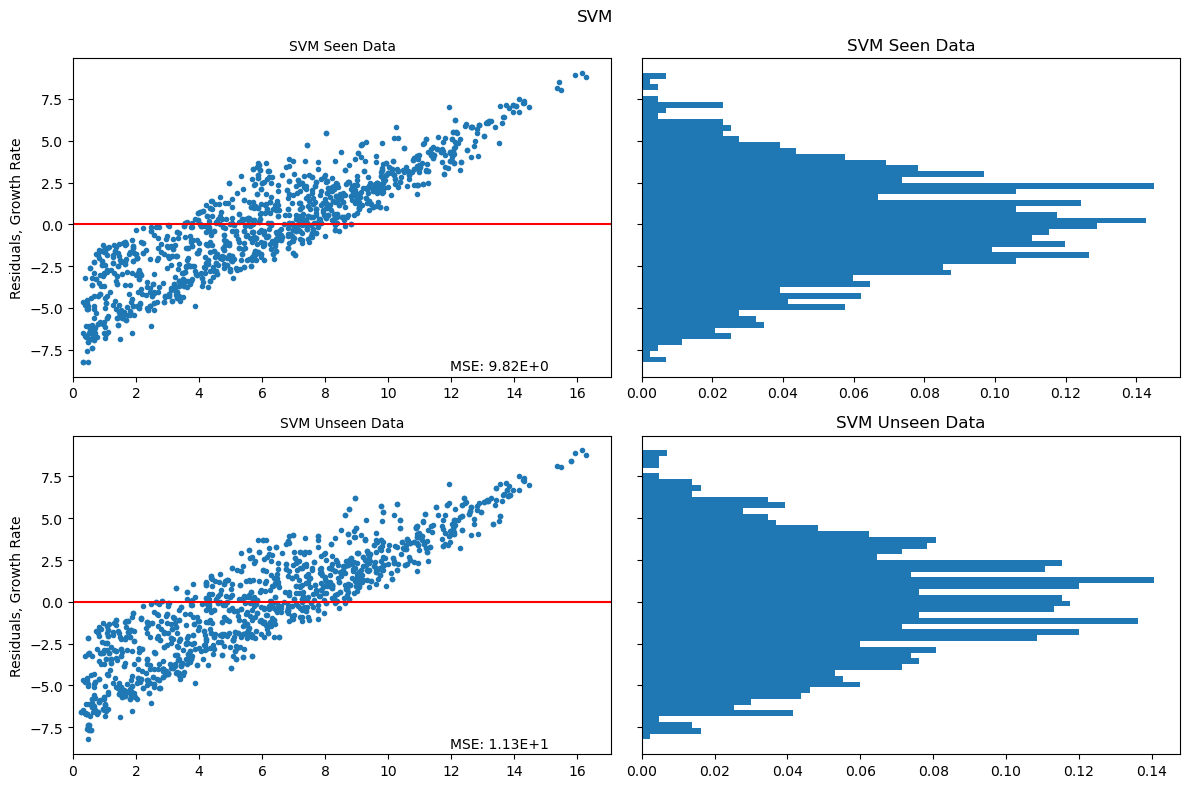

In [5]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
model_name = 'SVM'
ncol=2
nrow=2
width=6
height = 4
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100, sharey=True)
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_svm.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_svm.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

fig_residuals.suptitle('SVM')
fig_residuals.tight_layout()
fig_residuals.show()



# GPR 5000s_7p

In [10]:
import os
import matplotlib.pyplot as plt
from GENE_ML.gene_ml.dataset.ScanData import ScanData
# #data_set = ScanData('3560_3p', ssh_path='lumi:$out/ped2_safescan/scanfiles0012/scan.log', test_percentage=50)
# data_set = ScanData('3560_3p', test_percentage=50)

#imports
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
results_gpr_name = 'dummy'#'results_5000s_7p_gpr_50tp' #
results_gpr = Results(results_gpr_name)

if os.path.exists(results_gpr.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr = results_gpr.load()
    print(f'{results_gpr.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    # data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    gpr = GPR('gpr')
    gpr.train(data_set.x_train, data_set.growthrate_train)
    gpr.tune_hypers(data_set.x_train, data_set.growthrate_train)
    print("OPTIMISER",gpr.regressor.preferred_optimizer)
    results_gpr.growthrate_predict_seen, results_gpr.growthrate_predict_seen_errors = gpr.predict(data_set.x_train)
    results_gpr.growthrate_predict_unseen, results_gpr.growthrate_predict_unseen_errors = gpr.predict(data_set.x_test)

    results_gpr.save()


LOADING RESULTS FROM FILE

dummy IS LOADED


In [32]:
gpr = GPR('gpr')
gpr.regressor.preferred_optimizer()

AttributeError: 'NoneType' object has no attribute 'preferred_optimizer'

NameError: name 'results_gpr' is not defined

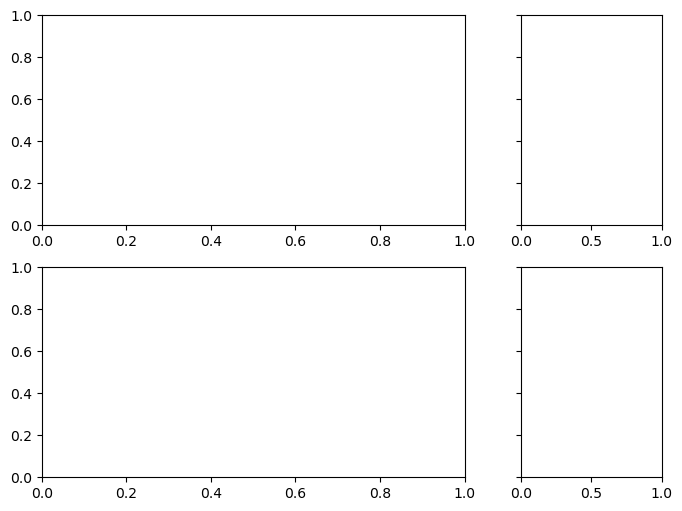

In [5]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

model_name = 'GPR'
ncol=2
nrow=2
width=4
height = 3
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', y_pred_err=results_gpr.growthrate_predict_seen_errors)
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', y_pred_err=results_gpr.growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

# ax4.sharex(ax2)
ax4.set_ylabel('')
ax2.set_ylabel('')
fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()


In [23]:
print(parameters)
data_set.df


['box-kymin', '_grp_species_1-omt', '_grp_species_0-omt', 'species-omn', 'geometry-q0', 'geometry-shat', 'general-beta']


,run_time,omt2,omt1,omn1,shat1,q01,beta1,kymin1,growthrate,frequency
0,3.972,55.19910,33.96021,52.008700,1.315692,3.843630,0.001105,0.225655,5.3950,9.1130
1,1.705,54.62636,69.78608,51.447960,1.498748,5.092838,0.003788,0.239661,10.1140,13.8750
7,1.906,61.25873,56.25225,18.619810,1.736063,5.487717,0.001865,0.115503,9.8640,4.0210
10,21.402,33.22105,37.66978,12.453850,1.773974,3.949417,0.003445,0.475377,1.9310,-2.5220
13,2.036,37.51825,39.12765,59.017660,1.083528,3.687322,0.002222,0.108494,11.8230,5.1930
...,...,...,...,...,...,...,...,...,...,...
239,7.657,66.60476,35.13247,45.245700,3.121494,5.193880,0.001799,0.298063,3.5080,10.9830
240,14.749,60.72701,20.90660,40.640050,1.429262,5.057919,0.001787,0.364511,3.3100,10.1990
241,11.208,30.88569,16.21406,6.317262,2.238682,5.506229,0.002725,0.475426,3.1610,4.3160
244,15.154,27.77436,26.30215,20.327830,3.668582,4.951364,0.003851,0.856212,0.5890,-8.3100


# XGBoost 5000s_7p

In [9]:
import os
import matplotlib.pyplot as plt
from GENE_ML.gene_ml.dataset.ScanData import ScanData
# #data_set = ScanData('3560_3p', ssh_path='lumi:$out/ped2_safescan/scanfiles0012/scan.log', test_percentage=50)
# data_set = ScanData('3560_3p', test_percentage=50)

#imports
from GENE_ML.gene_ml.models.XGBoost import XGBoost
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
results_xgb_name = 'results_5000s_7p_xgb_50tp' #
results_xgb = Results(results_xgb_name)

if os.path.exists(results_xgb.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_xgb = results_xgb.load()
    print(f'{results_xgb.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    xgb = XGBoost()
    xgb.train(data_set.x_train, data_set.growthrate_train)
    results_xgb.growthrate_predict_seen = xgb.predict(data_set.x_train)
    results_xgb.growthrate_predict_unseen = xgb.predict(data_set.x_test)

    results_xgb.save()


LOADING RESULTS FROM FILE

results_5000s_7p_xgb_50tp IS LOADED


NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_338339/3712264755.py:18: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


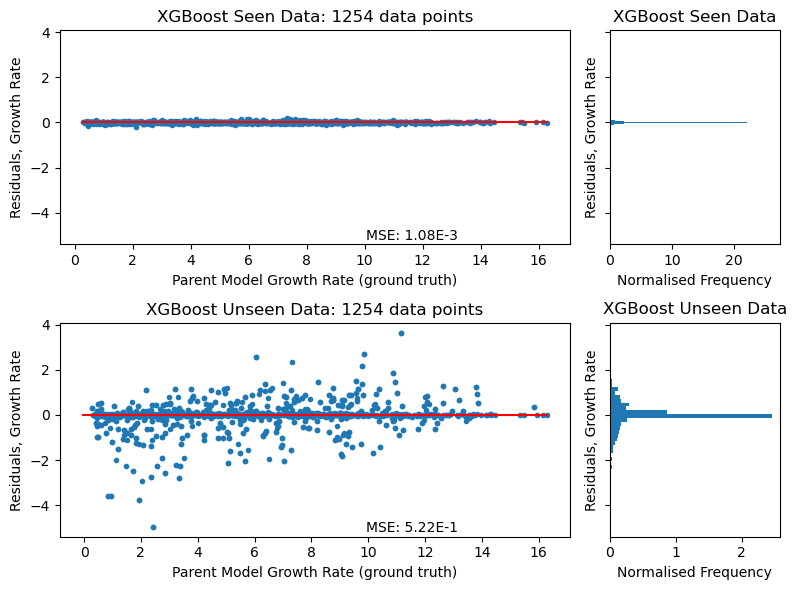

In [15]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
model_name = 'XGBoost'
ncol=2
nrow=2
width=4
height=3
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_xgb.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_xgb.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

# fig_residuals.suptitle('SVM')
fig_residuals.tight_layout()
fig_residuals.show()

# NN

In [15]:
results_nn_name = 'results_5000s_7p_nn_50tp' #
results_nn = Results(results_nn_name)

In [16]:
results_nn.load()

FileNotFoundError: [Errno 2] No such file or directory: 'saved_results/results_5000s_7p_nn_50tp'

In [17]:
import os
from GENE_ML.gene_ml.results.results import Results
from GENE_ML.gene_ml.models.NN import NN
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler



#numsamples_numparameters_model_testpercentage
results_nn_name = 'results_5000s_7p_nn_50tp' #
results_nn = Results(results_nn_name)

if os.path.exists(results_nn.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_nn = results_nn.load()
    print(f'{results_nn.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    
    train_batch_size = 32
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    nn = NN()

    scalerX = MinMaxScaler()
    X_normalized = scalerX.fit_transform(data_set.x_train)
    X_normalized = torch.Tensor(X_normalized)

    X_val_normalized = scalerX.transform(data_set.x_test)
    X_val_normalized = torch.Tensor(X_val_normalized)

    scalerY = MinMaxScaler()
    Y_normalized = scalerY.fit_transform(data_set.growthrate_train.reshape(-1,1))
    Y_normalized = torch.Tensor(Y_normalized)

    Y_val_normalized = scalerY.transform(data_set.growthrate_test.reshape(-1,1))
    Y_val_normalized = torch.Tensor(Y_val_normalized)

    training = TensorDataset(X_normalized,Y_normalized)
    val = TensorDataset(X_val_normalized,Y_val_normalized)

    train_dataloader = DataLoader(dataset = training, batch_size=train_batch_size, shuffle=True)
    val_dataloader = DataLoader(dataset = val, batch_size = 32, shuffle=False)

    nn.train(train_dataloader, val_dataloader, 10000, train_batch_size)

    predict_seen = nn.predict(X_normalized)
    predict_seen = scalerY.inverse_transform(predict_seen.detach().numpy())
    predict_seen = predict_seen.squeeze()

    X_unseen_normalized = scalerX.transform(data_set.x_test)
    X_unseen_normalized = torch.Tensor(X_unseen_normalized)
    predict_unseen = nn.predict(X_unseen_normalized)
    predict_unseen = scalerY.inverse_transform(predict_unseen.detach().numpy())
    predict_unseen = predict_unseen.squeeze()

    # scalerX = MinMaxScaler()
    # X_normalized = scalerX.fit_transform(data_set.x_train)
    # X_normalized = torch.Tensor(X_normalized)

    # val_X_normalized = scalerX.transform(data_set.x_test)
    # val_X_normalized = torch.Tensor(val_X_normalized)

    # scalerY = MinMaxScaler()
    # Y_normalized = scalerY.fit_transform(data_set.growthrate_train.reshape(-1,1))
    # Y_normalized = torch.Tensor(Y_normalized)
    
    # val_Y_normalized = scalerY.transform(data_set.growthrate_test.reshape(-1,1))
    # val_Y_normalized = torch.Tensor(val_Y_normalized)

    # training = TensorDataset(X_normalized,Y_normalized)
    # validation = TensorDataset(val_X_normalized, val_Y_normalized)

    # train_dataloader = DataLoader(dataset = training, batch_size=train_batch_size, shuffle=True)
    # val_dataloader = DataLoader(dataset = validation, batch_size=None, shuffle=False)

    # nn.train(train_dataloader, val_dataloader, 10000, train_batch_size)

    # predict_seen = nn.predict(X_normalized)
    # predict_seen = scalerY.inverse_transform(predict_seen.detach().numpy())
    # results_nn.growthrate_predict_seen = predict_seen.squeeze()

    # X_unseen_normalized = scalerX.fit_transform(data_set.x_test)
    # X_unseen_normalized = torch.Tensor(X_unseen_normalized)
    # predict_unseen = nn.predict(X_unseen_normalized)
    # predict_unseen = scalerY.inverse_transform(predict_unseen.detach().numpy())
    # results_nn.growthrate_predict_unseen = predict_unseen.squeeze()
    
    # results_nn.save()


LOADING RESULTS FROM FILE

results_5000s_7p_nn_50tp IS LOADED


NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_223272/2590955243.py:18: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


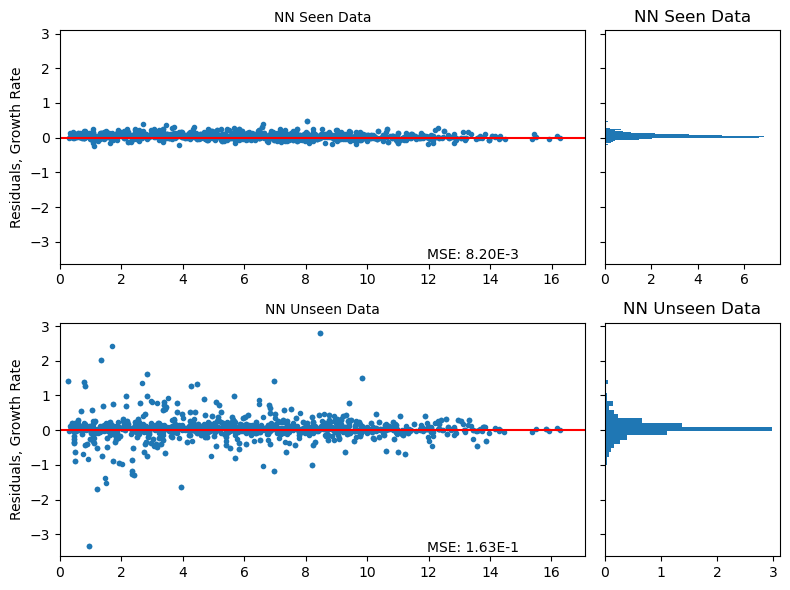

In [18]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
model_name = 'NN'
ncol=2
nrow=2
width = 4
height = 3
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), sharey=True,gridspec_kw={'width_ratios': [3, 1]})
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_nn.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_nn.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_nn.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_nn.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

# fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()

# Comparison



NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_223272/2523104561.py:31: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


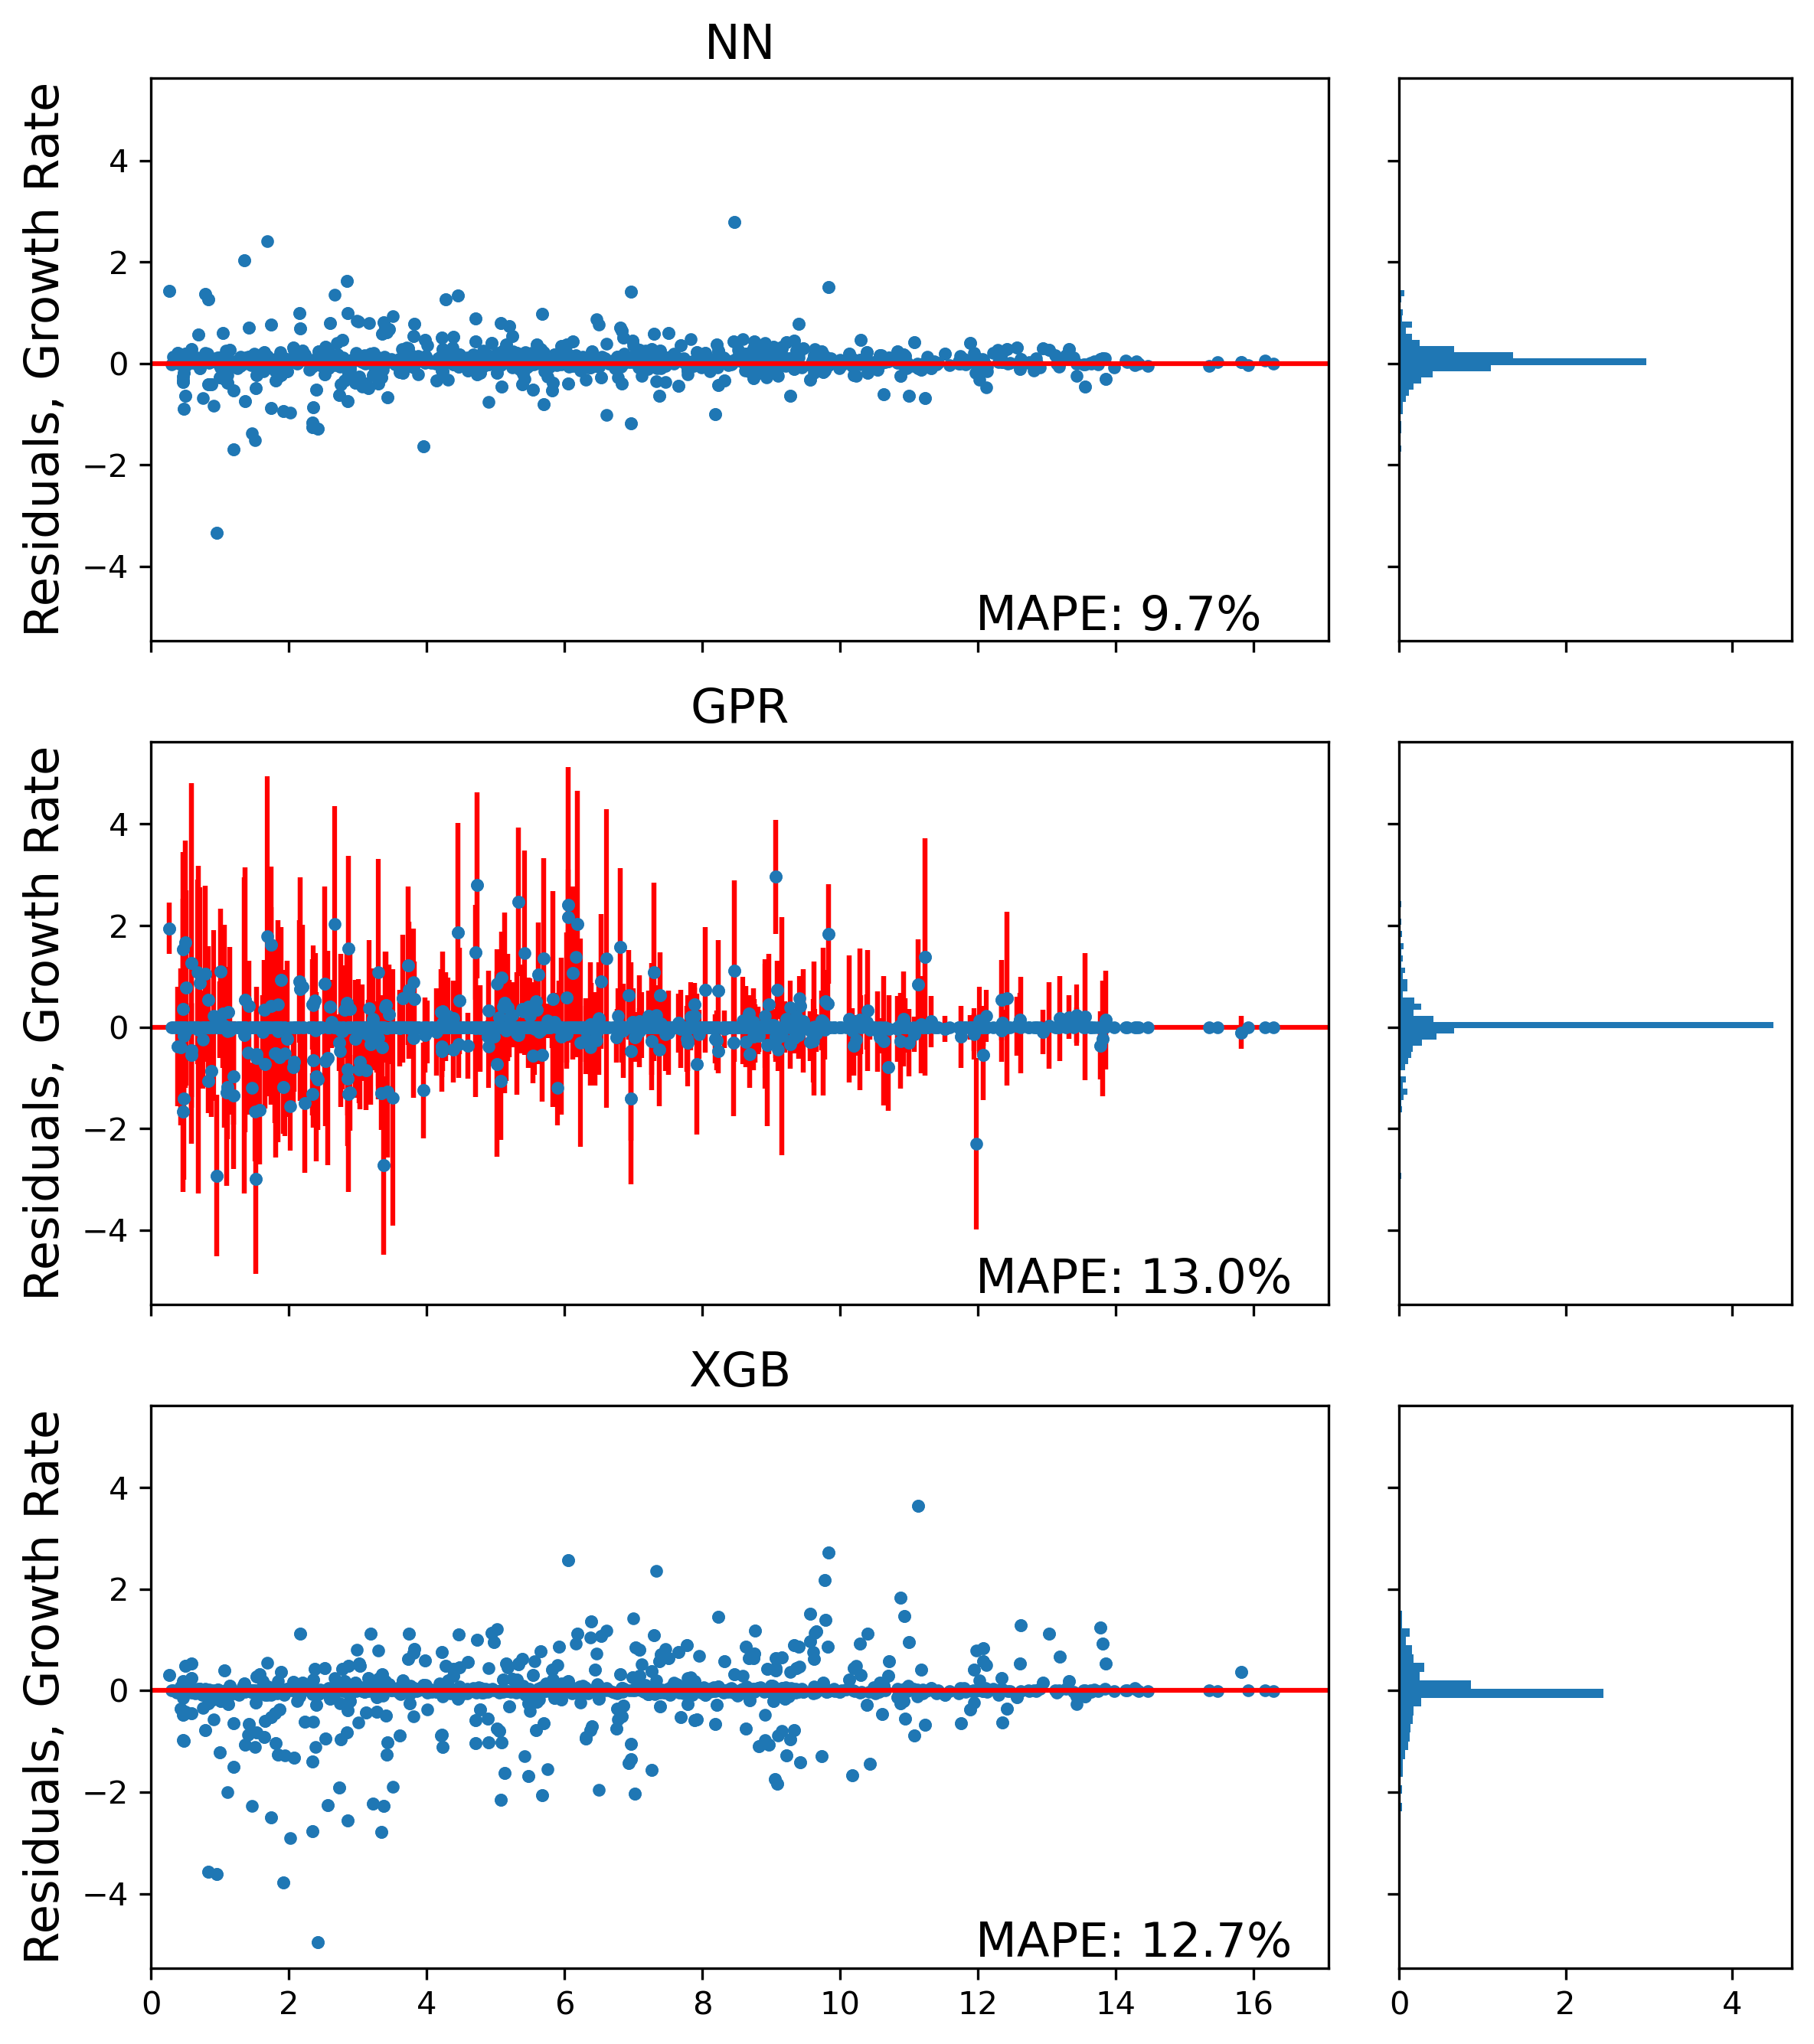

In [23]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
ncol=2
nrow=3
width=2*2
height=1.5*2
fig_residuals, [[ax1,ax2],[ax3,ax4], [ax5,ax6]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=300, sharex='col', sharey=True, gridspec_kw={'width_ratios': [3, 1]})


# model_name='SVM'
# vis.residual_plot(ax1, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
# vis.residual_hist(ax2, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
fs=15
model_name='NN'
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_test, results_nn.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name}', font_size=fs)
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_test, results_nn.growthrate_predict_unseen, var_name='Growth Rate')

model_name='GPR'
vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name}', y_pred_err=results_gpr.growthrate_predict_unseen_errors, font_size=fs)
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate')

model_name='XGB'
vis.residual_plot(ax5, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name}', font_size=fs)
vis.residual_hist(ax6, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
fig_residuals.tight_layout()
fig_residuals.show()